In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Preprocessing and feature engineered data.csv')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values with median (for numerical) or mode (for categorical)
df.fillna({
    'oil_price': df['oil_price'].median(),
    'inflation_rate': df['inflation_rate'].median()
}, inplace=True)

# Ensure correct data types
df['order_date'] = pd.to_datetime(df['order_date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# Display dataset overview
print(df.info())
print(df.head())


Missing Values:
 Category                   0
city                       0
country                    0
Customer.ID                0
Customer.Name              0
Discount                   0
market                     0
order_date                 0
Order.ID                   0
Order.Priority             0
Product.ID                 0
Product.Name               0
Profit                     0
Quantity                   0
Region                     0
Row.ID                     0
Sales                      0
Segment                    0
Ship.Date                  0
Ship.Mode                  0
Shipping.Cost              0
State                      0
Sub.Category               0
Year                       0
Market2                    0
weeknum                    0
is_weekend                 0
month                      0
quarter                    0
week_of_year               0
season                     0
is_holiday                 0
days_before_holiday    42597
days_after_holiday        

In [7]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers(df, 'Sales')
df = remove_outliers(df, 'Profit')


In [8]:
# Extract date-based features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['weekday'] = df['order_date'].dt.day_name()
df['week_of_year'] = df['order_date'].dt.isocalendar().week

# Convert seasonality into categories
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
df['season'] = df['month'].map(seasons)

# Sort by Date
df = df.sort_values(by='order_date')

# Sales Growth Rate
df['Sales_Growth'] = df['Sales'].pct_change()
df['Sales_Growth'].fillna(0, inplace=True)

# Display sample
print(df[['order_date', 'year', 'month', 'weekday', 'week_of_year', 'season', 'Sales_Growth']].head())


      order_date  year  month   weekday  week_of_year  season  Sales_Growth
45740 2011-01-01  2011      1  Saturday            52  Winter      0.000000
32746 2011-01-01  2011      1  Saturday            52  Winter     -0.181818
45741 2011-01-01  2011      1  Saturday            52  Winter      1.666667
7960  2011-01-01  2011      1  Saturday            52  Winter     -0.450000
45739 2011-01-01  2011      1  Saturday            52  Winter      0.727273


<ipython-input-8-9933085e6a16>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales_Growth'].fillna(0, inplace=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


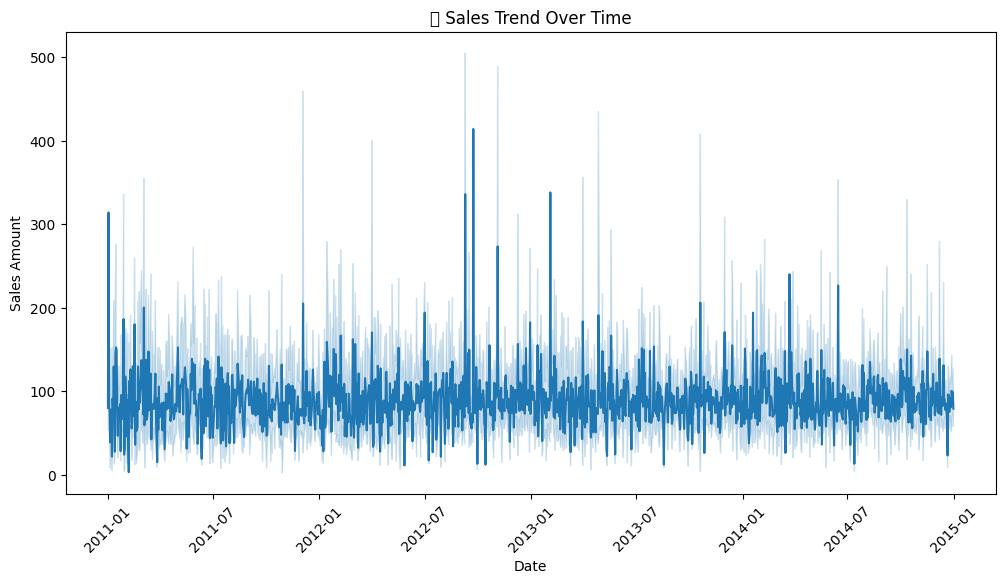

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['order_date'], y=df['Sales'])
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


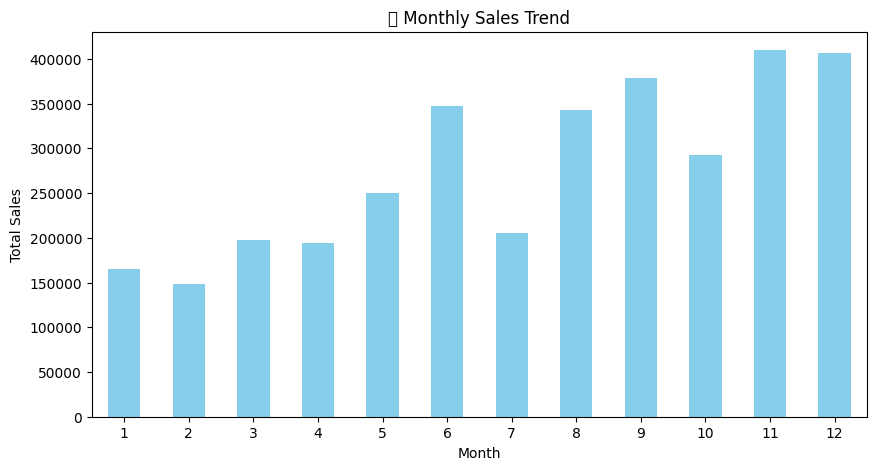

In [10]:
plt.figure(figsize=(10,5))
df.groupby('month')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("📊 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


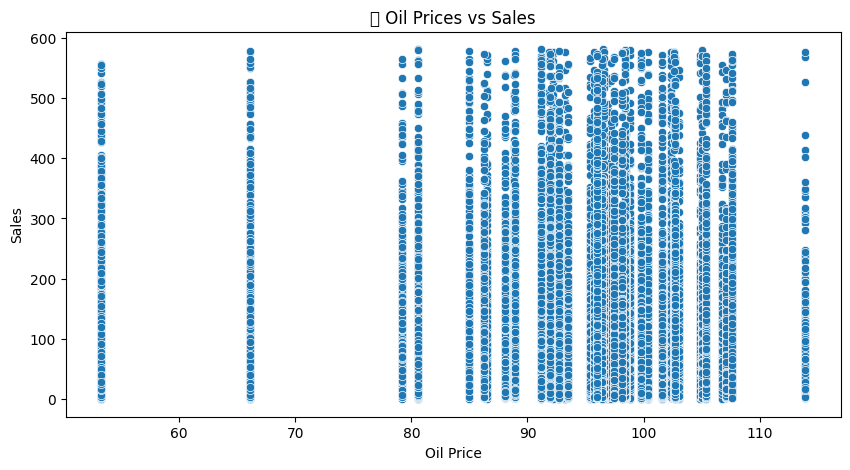

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


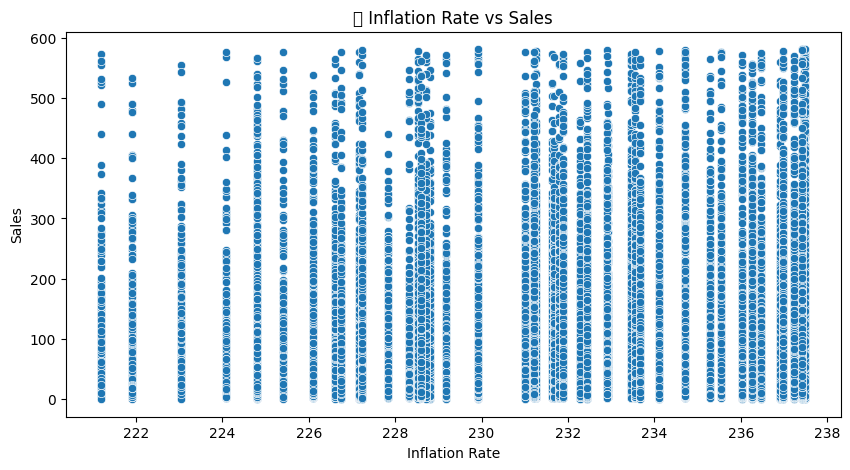

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['oil_price'], y=df['Sales'])
plt.title("⛽ Oil Prices vs Sales")
plt.xlabel("Oil Price")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['inflation_rate'], y=df['Sales'])
plt.title("📈 Inflation Rate vs Sales")
plt.xlabel("Inflation Rate")
plt.ylabel("Sales")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


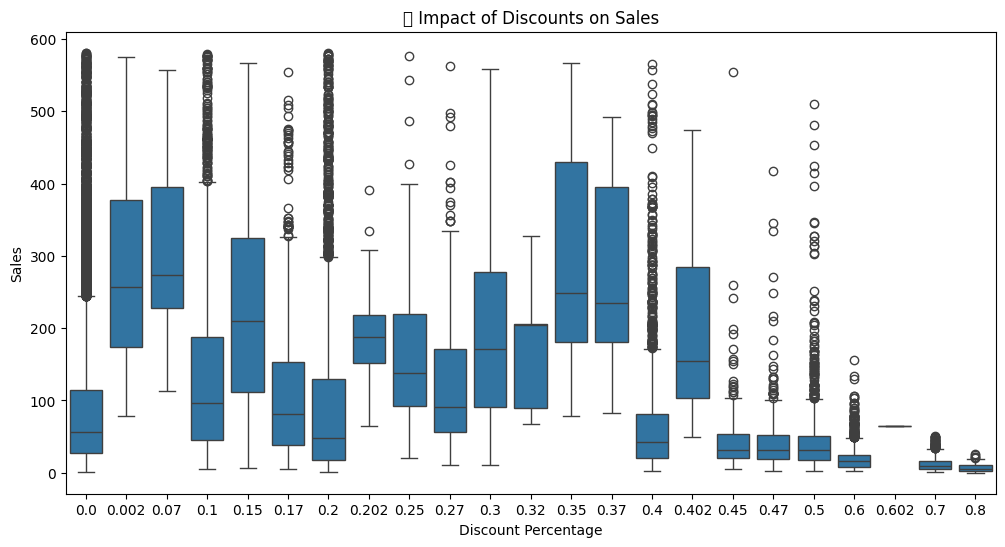

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Discount'], y=df['Sales'])
plt.title("📉 Impact of Discounts on Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Sales")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


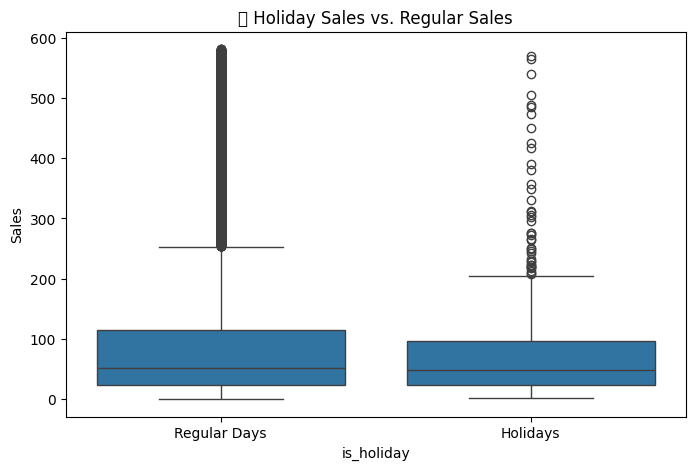

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['is_holiday'], y=df['Sales'])
plt.title("🎄 Holiday Sales vs. Regular Sales")
plt.xticks([0, 1], ['Regular Days', 'Holidays'])
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


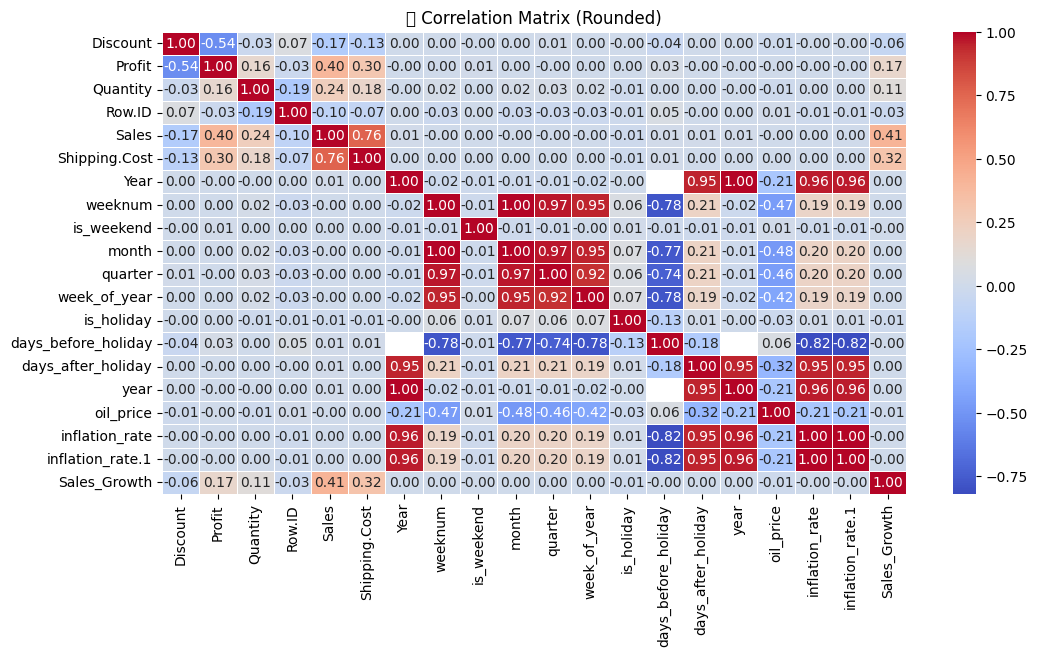

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number'])

# Round correlation values to 2 decimal places
corr_matrix = numeric_cols.corr().round(2)

# Plot heatmap with better formatting
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")  # fmt=".2f" limits decimals
plt.title("📌 Correlation Matrix (Rounded)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


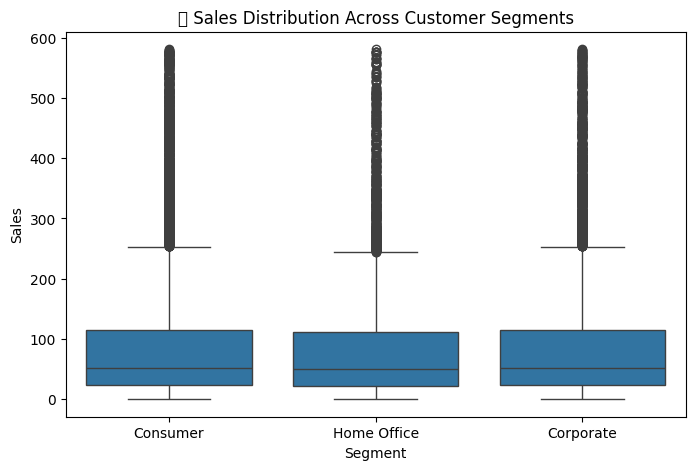

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title("📌 Sales Distribution Across Customer Segments")
plt.xticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


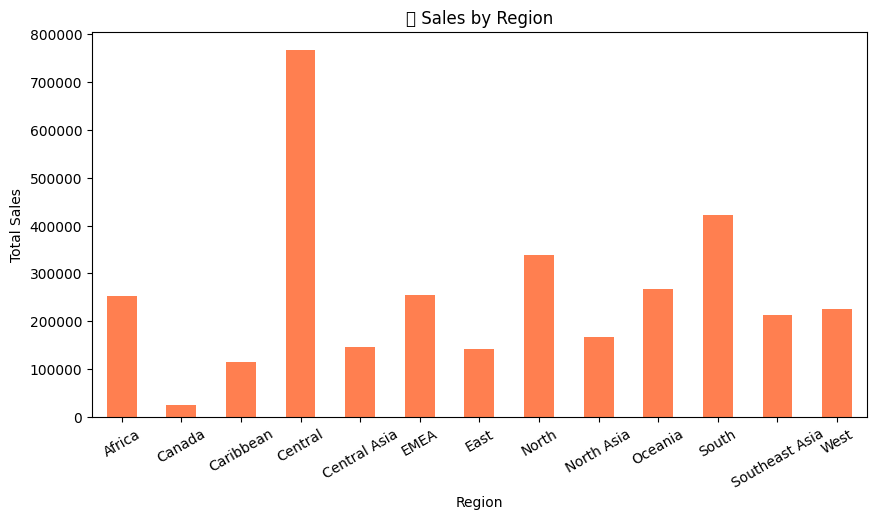

In [18]:
plt.figure(figsize=(10,5))
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='coral')
plt.title("📌 Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()


In [21]:
import pandas as pd
df.reset_index(drop=True, inplace=True)

pd.set_option('display.max_columns', None)
df.head()

,Category,city,country,Customer.ID,Customer.Name,Discount,market,order_date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,is_weekend,month,quarter,week_of_year,season,is_holiday,days_before_holiday,days_after_holiday,year,oil_price,inflation_rate,inflation_rate.1,weekday,Sales_Growth
0,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,0.1,APAC,2011-01-01,IN-2011-47883,Medium,OFF-PA-10001968,"Eaton Computer Printout Paper, 8.5 x 11",15.342,2,Oceania,22254,55,Consumer,2011-01-08,Standard Class,1.80,New South Wales,Paper,2011,APAC,1,1,1,1,52,Winter,1,0.0,0,2011,92.19,221.187,221.187,Saturday,0.000000
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,0.5,EU,2011-01-01,IT-2011-3647632,High,OFF-PA-10001492,"Enermax Note Cards, Premium",-26.055,3,North,11731,45,Home Office,2011-01-05,Second Class,4.82,Stockholm,Paper,2011,EU,1,1,1,1,52,Winter,1,0.0,0,2011,92.19,221.187,221.187,Saturday,-0.181818
2,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,0.1,APAC,2011-01-01,IN-2011-47883,Medium,OFF-SU-10000618,"Acme Trimmer, High Speed",36.036,3,Oceania,22253,120,Consumer,2011-01-08,Standard Class,9.72,New South Wales,Supplies,2011,APAC,1,1,1,1,52,Winter,1,0.0,0,2011,92.19,221.187,221.187,Saturday,1.666667
3,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,0.0,EMEA,2011-01-01,HU-2011-1220,High,OFF-TEN-10001585,"Tenex Box, Single Width",29.640,4,EMEA,48883,66,Consumer,2011-01-05,Second Class,8.17,Budapest,Storage,2011,EMEA,1,1,1,1,52,Winter,1,0.0,0,2011,92.19,221.187,221.187,Saturday,-0.450000
4,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,0.1,APAC,2011-01-01,IN-2011-47883,Medium,FUR-FU-10003447,"Eldon Light Bulb, Duo Pack",37.770,5,Oceania,22255,114,Consumer,2011-01-08,Standard Class,4.70,New South Wales,Furnishings,2011,APAC,1,1,1,1,52,Winter,1,0.0,0,2011,92.19,221.187,221.187,Saturday,0.727273


In [22]:
import pandas as pd

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales data by day
df_sales = df.groupby('order_date')['Sales'].sum().reset_index()

# Display processed data
print(df_sales.head())


  order_date  Sales
0 2011-01-01    400
1 2011-01-02    314
2 2011-01-03    950
3 2011-01-04   1087
4 2011-01-05    155


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


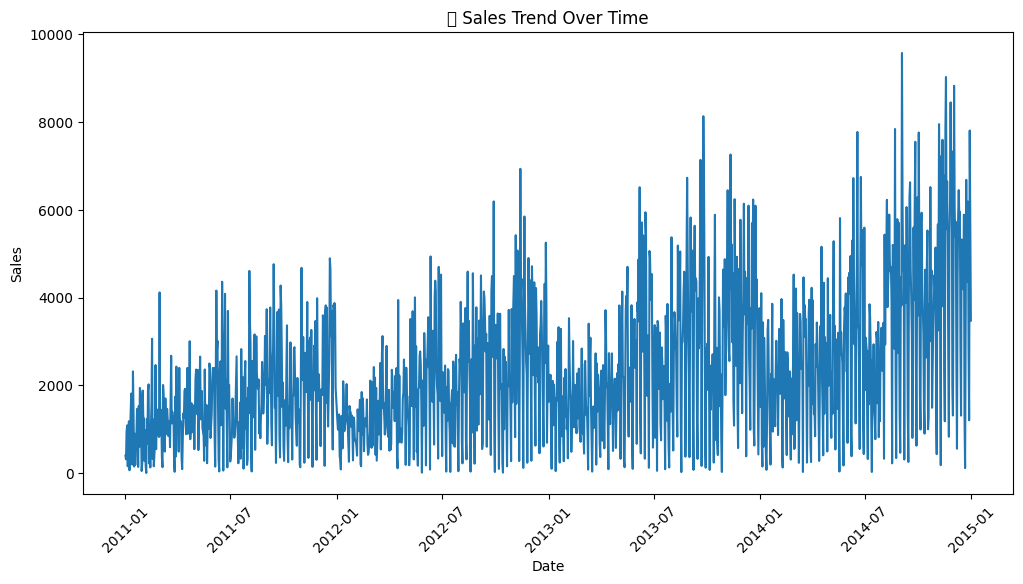

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x=df_sales['order_date'], y=df_sales['Sales'])
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df_sales['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -3.005958073550094
p-value: 0.034341725038052925


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


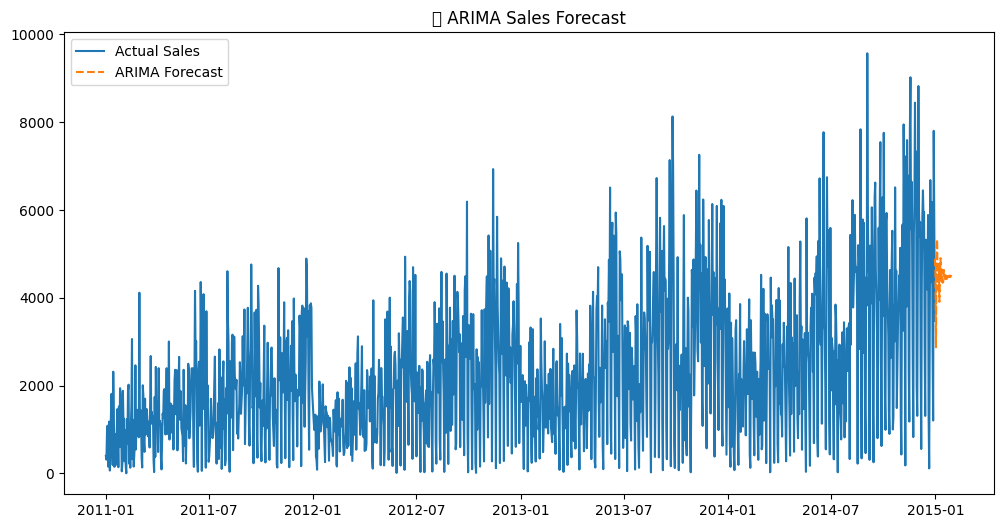

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model (p,d,q)=(5,1,0) - Adjust for best fit
model = ARIMA(df_sales['Sales'], order=(5,1,0))
model_fit = model.fit()

# Predict Next 30 Days
future_steps = 30
forecast = model_fit.forecast(steps=future_steps)

# Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(df_sales['order_date'], df_sales['Sales'], label='Actual Sales')
plt.plot(pd.date_range(df_sales['order_date'].max(), periods=future_steps, freq='D'), forecast, label='ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.title("📊 ARIMA Sales Forecast")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1pzv5u0_/at0284ir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1pzv5u0_/x6_ep2c7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92229', 'data', 'file=/tmp/tmp1pzv5u0_/at0284ir.json', 'init=/tmp/tmp1pzv5u0_/x6_ep2c7.json', 'output', 'file=/tmp/tmp1pzv5u0_/prophet_model3b_h1_3u/prophet_model-20250219192327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


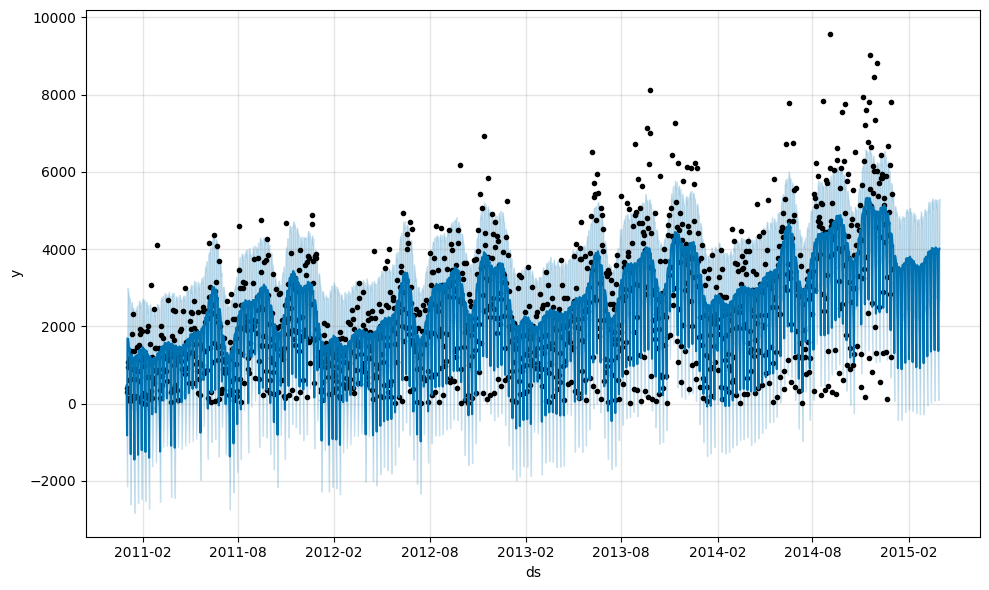

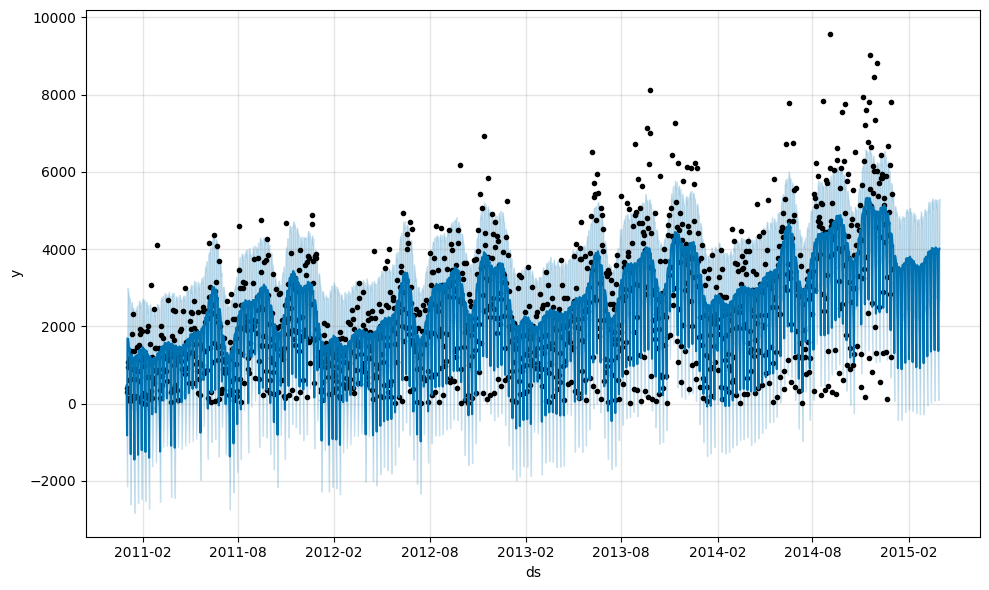

In [26]:
from prophet import Prophet

# Rename columns for Prophet
df_sales.rename(columns={'order_date': 'ds', 'Sales': 'y'}, inplace=True)

# Initialize & Train Prophet Model
model = Prophet()
model.fit(df_sales)

# Predict Future Sales
future = model.make_future_dataframe(periods=90)  # Predict next 90 days
forecast = model.predict(future)

# Plot Predictions
model.plot(forecast)


In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale sales data
scaler = MinMaxScaler()
df_sales_scaled = scaler.fit_transform(df_sales[['y']])

# Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Use last 30 days to predict the next
X, y = create_sequences(df_sales_scaled, seq_length)

# Reshape X for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X, y, epochs=50, batch_size=16)

# Select last sequence for prediction
last_sequence = X[-1].reshape(1, seq_length, 1)  # Correct shape: (1, 30, 1)

# Predict next day's sales
future_preds = model.predict(last_sequence)

# Convert back to original sales scale
future_sales = scaler.inverse_transform(future_preds)
print(f"Next Day Sales Prediction: {future_sales[0][0]:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0319
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0226
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0216
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0234
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0241
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0223
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0222
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0224
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0204
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0188
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0242
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0225
Epoch 13/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0187
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0184
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0191
Epoch 16/50
88/

In [29]:
# Select last sequence for prediction
last_sequence = X[-1].reshape(1, seq_length, 1)  # Correct shape: (1, 30, 1)

# Predict next day's sales
future_preds = model.predict(last_sequence)

# Convert back to original sales scale
future_sales = scaler.inverse_transform(future_preds)
print(f"Next Day Sales Prediction: {future_sales[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Next Day Sales Prediction: 5669.54


In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Ensure 'order_date' is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales by date
df_sales = df.groupby('order_date')['Sales'].sum().reset_index()

# Normalize sales data
scaler = MinMaxScaler()
df_sales['scaled_sales'] = scaler.fit_transform(df_sales[['Sales']])

# Split into train (80%) and test (20%)
train_size = int(len(df_sales) * 0.8)
train, test = df_sales[:train_size], df_sales[train_size:]

# Display split summary
print(f"Train Size: {len(train)}, Test Size: {len(test)}")


Train Size: 1138, Test Size: 285


In [32]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Using last 30 days to predict next

# Create sequences for train and test sets
X_train, y_train = create_sequences(train['scaled_sales'].values, seq_length)
X_test, y_test = create_sequences(test['scaled_sales'].values, seq_length)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}")


X_train Shape: (1108, 30, 1), X_test Shape: (255, 30, 1)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0253 - val_loss: 0.0518
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - val_loss: 0.0486
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0203 - val_loss: 0.0568
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0193 - val_loss: 0.0427
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0181 - val_loss: 0.0437
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0184 - val_loss: 0.0441
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - val_loss: 0.0407
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - val_loss: 0.0461
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - val_loss: 0.0411
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0176 - val_loss: 0.0353
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0178 - val_loss: 0.0382
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0165 - val_l

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


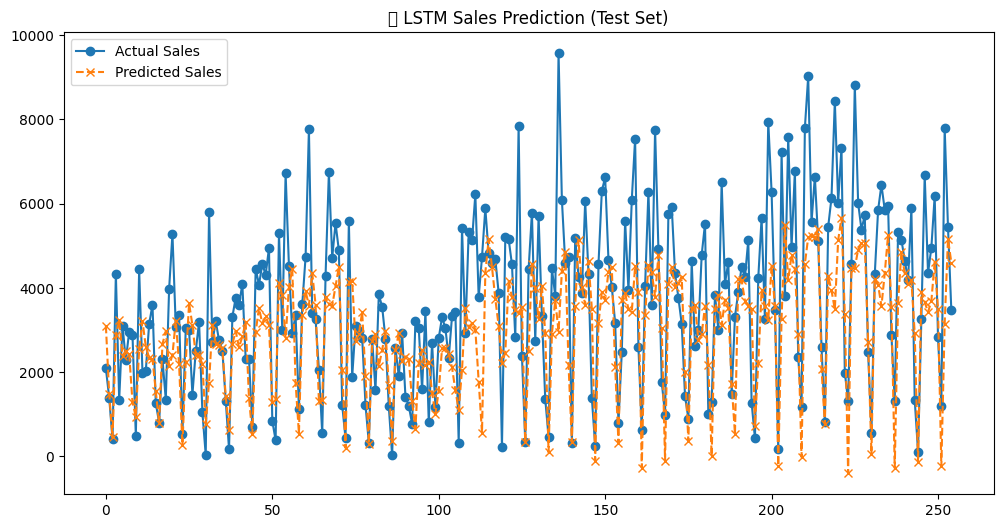

In [34]:
# Predict on test set
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot Actual vs. Predicted Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Sales", marker='o')
plt.plot(y_pred_actual, label="Predicted Sales", linestyle='dashed', marker='x')
plt.legend()
plt.title("📊 LSTM Sales Prediction (Test Set)")
plt.show()


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build Optimized LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length,1)),  # Increase LSTM units
    Dropout(0.2),  # Prevent overfitting
    LSTM(100, return_sequences=False),  # Second LSTM layer
    Dense(50, activation='relu'),  # More dense layers for better learning
    Dense(1)  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Add Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model with Validation Data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - loss: 0.0274 - val_loss: 0.0496
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0164 - val_loss: 0.0446
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0181 - val_loss: 0.0421
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0178 - val_loss: 0.0430
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0181 - val_loss: 0.0503
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0176 - val_loss: 0.0495
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0196 - val_loss: 0.0511
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0191 - val_loss: 0.0440


In [36]:
print(f"Original Sales Range: {df['Sales'].min()} - {df['Sales'].max()}")
print(f"Scaled Sales Range: {df_sales['scaled_sales'].min()} - {df_sales['scaled_sales'].max()}")


Original Sales Range: 0 - 581
Scaled Sales Range: 0.0 - 0.9999999999999999


In [37]:
# Inverse transform predictions
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Check values
print(f"Sample Prediction: {y_pred_actual[:5].flatten()}")
print(f"Actual Sales: {y_test_actual[:5].flatten()}")


Sample Prediction: [3106.2969 1489.2993  451.3454 2876.2468 3238.6074]
Actual Sales: [2093. 1394.  407. 4338. 1350.]


In [38]:
seq_length = 60  # Increase to 60 days for more historical context


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0300 - val_loss: 0.0434
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0194 - val_loss: 0.0465
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - val_loss: 0.0484
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0180 - val_loss: 0.0418
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0176 - val_loss: 0.0446
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0180 - val_loss: 0.0439
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - val_loss: 0.0413
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0179 - val_loss: 0.0435
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - val_loss: 0.0415
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0164 - val_loss: 0.0419
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0188 - val_loss: 0.0407
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


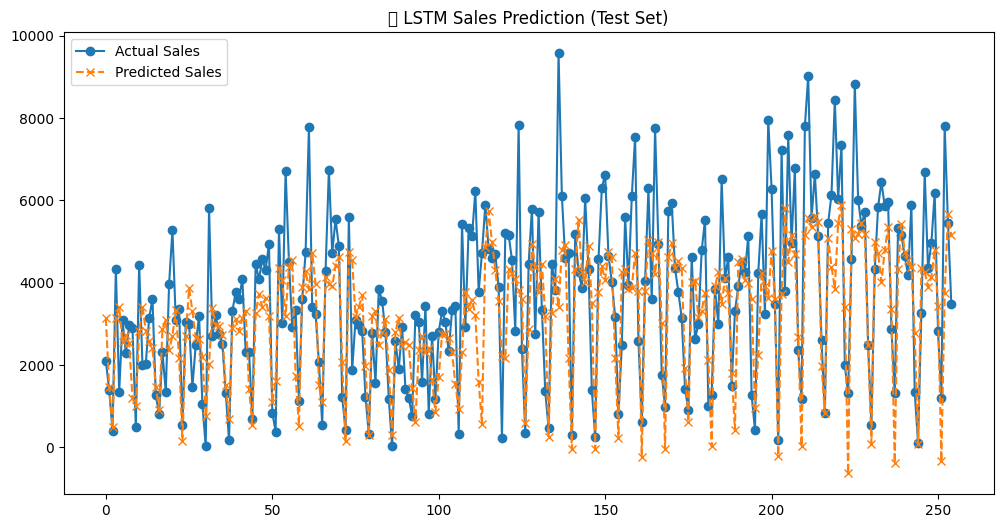

In [41]:
# Predict on test set
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot Actual vs. Predicted Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Sales", marker='o')
plt.plot(y_pred_actual, label="Predicted Sales", linestyle='dashed', marker='x')
plt.legend()
plt.title("📊 LSTM Sales Prediction (Test Set)")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1pzv5u0_/_fr30pqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1pzv5u0_/9jqf642g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5617', 'data', 'file=/tmp/tmp1pzv5u0_/_fr30pqn.json', 'init=/tmp/tmp1pzv5u0_/9jqf642g.json', 'output', 'file=/tmp/tmp1pzv5u0_/prophet_modeljl7ay588/prophet_model-20250219195310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:53:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


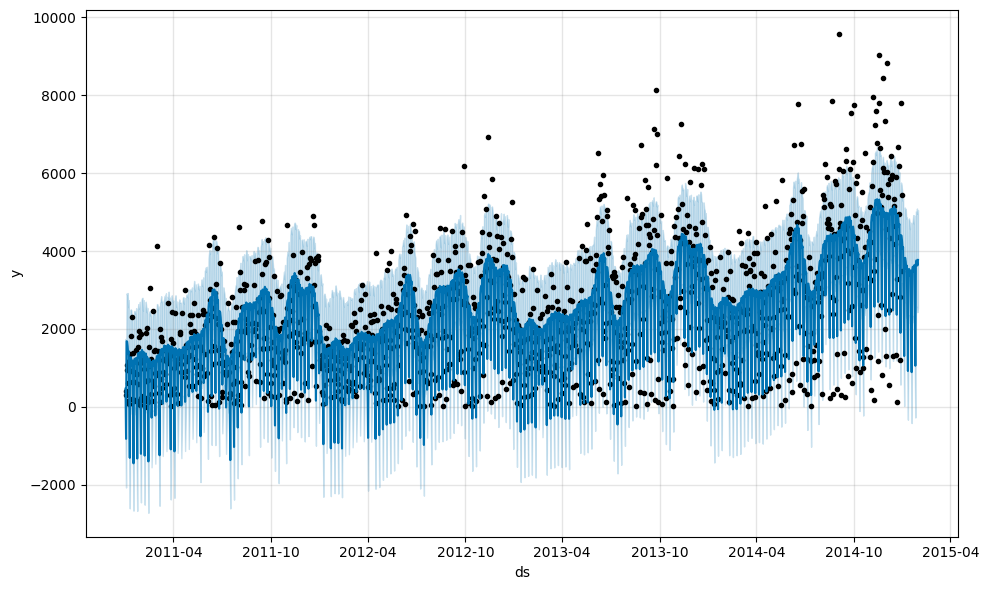

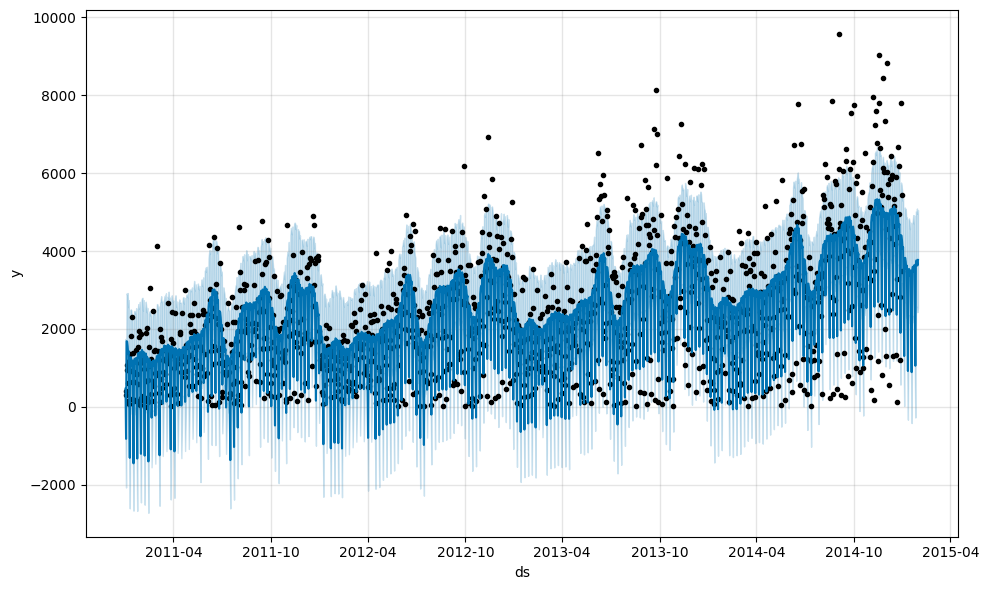

In [42]:
from prophet import Prophet

df_sales.rename(columns={'order_date': 'ds', 'Sales': 'y'}, inplace=True)
model_prophet = Prophet()
model_prophet.fit(df_sales)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

model_prophet.plot(forecast)


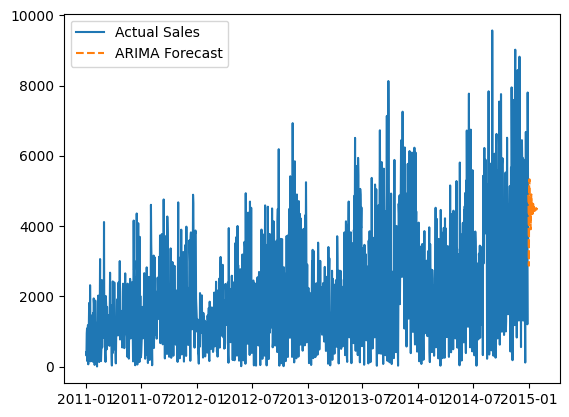

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df_sales['y'], order=(5,1,0))
model_fit = model_arima.fit()
forecast_arima = model_fit.forecast(steps=30)

plt.plot(df_sales['ds'], df_sales['y'], label="Actual Sales")
plt.plot(pd.date_range(df_sales['ds'].max(), periods=30, freq='D'), forecast_arima, linestyle='dashed', label="ARIMA Forecast")
plt.legend()
plt.show()


In [54]:
!pip install scikeras


In [55]:
!pip install scikeras[tensorflow]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define hyperparameter sets to test
neurons_list = [50, 100, 150]
dropout_list = [0.1, 0.2, 0.3]
batch_size_list = [16, 32, 64]
learning_rate_list = [0.01, 0.001, 0.0001]

best_model = None
best_loss = float('inf')

# Try different combinations
for neurons in neurons_list:
    for dropout_rate in dropout_list:
        for batch_size in batch_size_list:
            for learning_rate in learning_rate_list:
                print(f"Training model with {neurons} neurons, {dropout_rate} dropout, batch size {batch_size}, learning rate {learning_rate}")

                # Build model
                model = Sequential([
                    LSTM(neurons, return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
                    Dropout(dropout_rate),
                    LSTM(neurons, return_sequences=False),
                    Dense(50, activation='relu'),
                    Dense(1)
                ])

                # Compile
                model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

                # Train model
                history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

                # Get validation loss
                val_loss = min(history.history['val_loss'])
                print(f"Validation Loss: {val_loss}")

                # Store the best model
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_model = model
                    best_params = (neurons, dropout_rate, batch_size, learning_rate)

print(f"Best Model Parameters: Neurons={best_params[0]}, Dropout={best_params[1]}, Batch Size={best_params[2]}, Learning Rate={best_params[3]}")


Training model with 50 neurons, 0.1 dropout, batch size 16, learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Loss: 0.022193796932697296
Training model with 50 neurons, 0.1 dropout, batch size 16, learning rate 0.001
Validation Loss: 0.02042521722614765
Training model with 50 neurons, 0.1 dropout, batch size 16, learning rate 0.0001
Validation Loss: 0.04189201444387436
Training model with 50 neurons, 0.1 dropout, batch size 32, learning rate 0.01
Validation Loss: 0.021581273525953293
Training model with 50 neurons, 0.1 dropout, batch size 32, learning rate 0.001
Validation Loss: 0.021484093740582466
Training model with 50 neurons, 0.1 dropout, batch size 32, learning rate 0.0001
Validation Loss: 0.042174603790044785
Training model with 50 neurons, 0.1 dropout, batch size 64, learning rate 0.01
Validation Loss: 0.020639654248952866
Training model with 50 neurons, 0.1 dropout, batch size 64, learning rate 0.001
Validation Loss: 0.03674634173512459
Training model with 50 neurons, 0.1 dropout, batch size 64, learning rate 0.0001
Validation Loss: 0.042732395231723785
Training model with 